---

# **TEAM NOVAGREEN**

---

## Importation of Libraries

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # this ignores any possible errors that may happen while running codes

---

# Data Preparation

## Data Importation and Verification

In [54]:
df = pd.read_csv(r"C:\Users\USER PC\OneDrive\Desktop\Techcrush\Casptone Project Dataset\yield_df.csv") # Loading of dataset

df.head() # this display first top 5 columns of the dataset

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## Checking for basic info and null values in the dataset

In [55]:
print("Rows, Columns:", df.shape) # checking total number of rows and columns

print("\nChecking Missing values:\n", df.isna().sum()) # Checking for missing values

print("\nChecking for null values and datatype: ", df.info()) #Checking for null values

print("\nChecking for missing values in a row:\n", df.isna().sum(axis=1)) #Checking for values in a rows

print("\nColumns with unique with no information:  ", df.nunique().eq(1).sum()) # Checks columns with only one 

#unique value (no information) in a dataset?

display(df.head()) # Displaying the first 5 rows of the dataset

Rows, Columns: (28242, 8)

Checking Missing values:
 Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   a

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


##### The above information about the dataset reviewed the following:
- 28242 rows and 8 columns 
- 0 missing values
- 0 null values
- 0 missing values in the rows
- All datatypes are in order
- No column without information
- By observation, we have 1 unwanted column that needs to be dropped

## ------------ Data Cleaning --------

In [56]:
df.drop('Unnamed: 0', axis=1, inplace=True) # this drop a column named "Unnamed: 0"


# the essence of droping this column is because it does not have effect on our target

In [57]:
df.shape # gives number of columns and rows after dropping unwanted column

(28242, 7)

##### Renaming our colunm headings to proper format

In [58]:
col = ['Country', 'Crop', 'Year', 'Yield', 'Average Rainfall', 'Pesticides Tonne', 'Average Temp']

df.columns =col
df.head()


,Country,Crop,Year,Yield,Average Rainfall,Pesticides Tonne,Average Temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


#### To ensure all numeric columns are in numbers
We convert numeric fields to numbers using the block of codes below.

In [59]:
print(df.columns) # this print all the column headings

Index(['Country', 'Crop', 'Year', 'Yield', 'Average Rainfall', 'Pesticides Tonne', 'Average Temp'], dtype='object')


In [60]:
numeric_cols = ["Year", "Yield", "Average Rainfall", "Pesticides Tonne", "Average Temp"]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce") 

- By simple observation of the dataset columns: ***'Yield'***, is considered the main target variable (crop yield per hectare)

- ***'Average Rainfall'***, ***'Pesticides Tonne'***, ***'Average Temp'***, are considered the input features (factors affecting yield)
- ***'Area'***, ***'Item'***, ***'Year'***  are descriptive or categorical identifiers

#### To double check for possible target variable we use the block of codes below:

In [61]:
# Identify target column (yield)

target_var = [c for c in df.columns if 'yield' in c.lower() or 'production' in c.lower()] # Automatically detect a yield/prod-related column

if len(target_var) == 0: # If the code did not find any column containing those keywords
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist() # this collect all numeric columns because the target_var must be numbers

    if len(numeric_cols) == 0:
        
        raise ValueError("No numeric columns found to act as a target.") # If no numeric columns, the model can’t make predictions then stop
                               
    target = numeric_cols[-1] # if numeric columns exist, the last numeric column is the target variable.
    
else:

    target = target_var[0]
    
print("\nUsing target column for prediction:", target) # this print column for prediction


Using target column for prediction: Yield


In [62]:
df['Country'].nunique() # It returns the number of different countries in the dataset.

101

In [63]:
df['Crop'].nunique() # Returns number of different crops in the dataset.

10

In [64]:
df['Year'].unique() # # Returns number of different years in the dataset.

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

In [65]:
df['Crop'].value_counts() # Shows the frequency of each crop in the dataset.

Crop
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

#### ***The above table shows how many data records exist for each crop in the dataset.***
- ***Potatoes*** have the highest number of records ***(4,276)*** in the dataset.
- ***Maize***, ***Wheat***, ***Rice***, and ***Soybeans*** also have a large number of entries after Potatoes.
- ***Yam***, ***Plantains and others*** have the lowest number of entries of ***847 and 556*** respectively, making them the least represented crop in the dataset.

In [66]:
df['Country'].value_counts().sort_values(ascending=False).head(10) # this displays the 10 countries with the most entries in the dataset.

Country
India           4048
Brazil          2277
Mexico          1472
Pakistan        1449
Australia        966
Japan            966
Indonesia        828
South Africa     644
Turkey           625
Ecuador          621
Name: count, dtype: int64

### The above table shows the top 10 countries with the highest number of data records in the dataset.
- ***India*** has the most entries of ***4,048***. which means India is a major agriculture producer in the dataset.
- Countries like ***Brazil, Mexico, Pakistan***, and ***Australia*** also have many records, showing they are major agricultural producer countries in the dataset.
- ***South Africa, Turky***, and ***Ecuador*** has the lowest count of 644, 625, and 621 among the top 10 entries respectively, but still ranks high compared to other countries not listed.

In [67]:
df['Country'].value_counts().sort_values(ascending=False).tail(10)  # This displays the 10 least-represented countries in the dataset.

Country
Ireland       46
Finland       46
Sweden        46
Norway        46
Estonia       42
Latvia        42
Belgium       39
Bahrain       29
Sudan         28
Montenegro    24
Name: count, dtype: int64

- Montenegro is the countries with the least entries in the dataset

---



# Exploratory Data Analysis (EDA)
## Statistical Summary of Data

In [68]:
print("\nDescriptive statistics (numeric columns):") # This print the heading

display(df[numeric_cols].describe().T) # This prints a formatted table showing key statistics for all numeric features in the dataset.


Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
Yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
Average Rainfall,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
Pesticides Tonne,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
Average Temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


## ------------- Insight -------------------

#### From the above info the dataset contains ***28,242*** records for each numeric column, which means there is no missing data in the dataset.

#### Year
- Average year of data: ***2001***
- Range: ***1990 to ***2013**
This dataset covers about 23 years of agricultural records.

#### Yield
- Average crop yield: ***77,053 hg/ha***
- Very high standard deviation of ***~84,957***, these yields vary widely across crops and countries
- Range: ***50*** to ***501,412 hg/ha***
This means there is huge variation in productivity depending on crop type, country, and growing conditions.

#### Average Rainfall
- Average rainfall: ***1,149 mm/year***
- Range: ***51*** to ***3,240 mm/year***
Countries included in the dataset have very different climates, from extremely dry to very wet.

#### Pesticides (Tonnes)
- Average: ***37,076 tonnes***
- This shows a very high variation std of ***≈ 59,959***
This may be due to the fact that some countries use almost none, while others use very high amounts
This suggests big differences in farming practices and technology adoption.

#### Average Temperature
- Average temp: ***20.5°C***
- Range: ***1.3 to 30.6°C***
The data spans cold climates to tropical environments.

#### **In summary**

- Wide spread in yields, meaning productivity differs greatly by crop and region.
- Big variation in rainfall & temperature which means the dataset includes diverse climate zones.
- Huge difference in pesticide use, this means some countries farm organically or lower input while others with highl chemical uses.
- No missing numeric data, that means the data is good for analysis.

## Quick statistics for target and check for extreme values

Text(0.5, 1.0, 'Counplot of Crops')

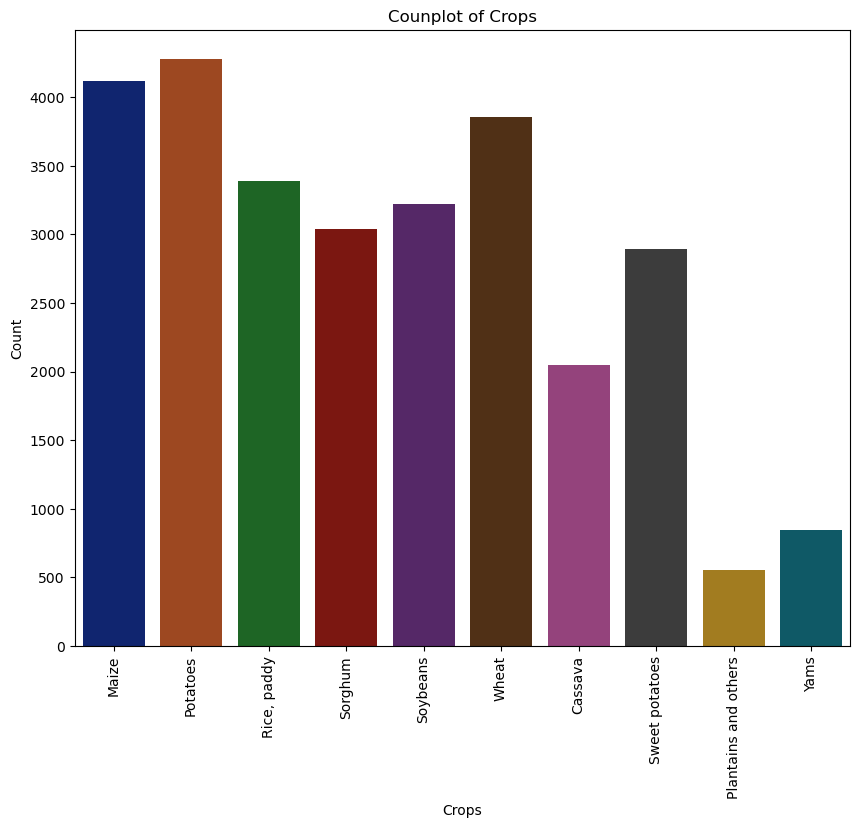

In [69]:
plt.figure(figsize=(10,8)) # this creates a new figure (chart) and sets its size to 10 width and 8 height.

sns.countplot(data=df, x="Crop", palette='dark') # this draws a countplot using Seaborn, displays them as bars, and usng dark palette

plt.xticks(rotation=90) # set rotation to 90 degrees so they don't overlap

plt.xlabel("Crops") # set the x-axis label as "Crops"

plt.ylabel("Count") # set the y-axis label as "Count"

plt.title("Counplot of Crops") # set the title of plot as "Counplot of Crops".

## ****--------------- Insight ---------------****

- From the Countplot, Potatoes, Maize, and Wheat has the highest count.
- while Yam, Plantains and Othrs has the least represented count.

### Top and Bottom 10 Countries by Average Yield

***This helps identify which crops dominate the dataset***

In [70]:
country_yield = df.groupby('Country')['Yield'].mean().sort_values(ascending=False) # this groups the data by Country
                                                                                    # Calculates the average yield for each country
                                                                                    # Sorts the results from highest to lowest

print("\nTop 10 countries by yield:\n", country_yield.head(10)) # this print Top 10 countries with the highest average yield


Top 10 countries by yield:
 Country
United Kingdom    240956.478261
Belgium           216468.461538
Denmark           214033.020000
Netherlands       204151.202899
Ireland           197913.695652
New Zealand       191931.826087
Sweden            187405.500000
Bahrain           153237.551724
Norway            146115.326087
Switzerland       144960.282609
Name: Yield, dtype: float64


#### ***The above result shows countries that have the best crop performance on average.***

**These countries achieve very high yields and this may be as a result of:**
- Modern machinery used
- High-quality seeds
- Strong fertilizer and pesticide use
- Advanced farming techniques and infrastructure

In [71]:
print("\nBottom 10 countries by yield:\n", country_yield.tail(10)) # this print Bottom 10 with the lowest average yield


Bottom 10 countries by yield:
 Country
Nepal                       35771.417391
Angola                      34893.676829
Ecuador                     34324.623188
Burundi                     33966.888889
Madagascar                  33171.320652
Burkina Faso                33061.614130
Mauritania                  27738.142857
Central African Republic    26432.465839
Eritrea                     18155.200000
Botswana                     7353.921875
Name: Yield, dtype: float64


#### ***The above result shows countries (mostly lower-income nations) that have the worse crop performance on average.***

***These nations have low crop productivity possibly due to:***
- Limited access to modern farming tools
- Climate challenges such as drought
- Low fertilizer and pesticide usage
- Smaller-scale subsistence farming
- Soil degradation or water scarcity or poor irrigation

# ****-------------- Insight Summary----------------****

- ***The results show a strong relationship between agricultural development levels and crop productivity.***
- ***Developed countries lead in yield may be due to advanced farming practices, while developing countries struggle with lower yields due to limited resources and challenging environmental conditions.***

## Bar Chart to Display Top vs Bottom 10 Countries by Yield

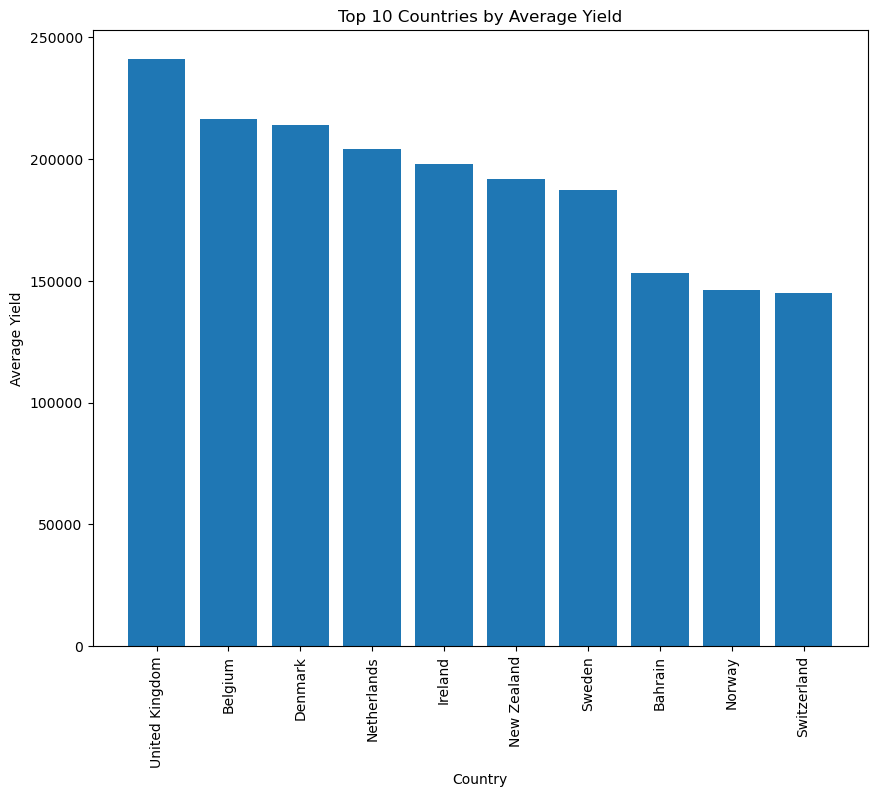

In [72]:
top10 = country_yield.head(10) # this takes the top 10 countries from the sorted list

plt.figure(figsize=(10,8)) # Set figure size to 10 width and 8 height

plt.bar(top10.index, top10.values) # Creates a bar chart

plt.xticks(rotation=90) # this rotates the country names to 90 degrees so they don’t overlap

plt.xlabel("Country") # X-axis shows the names of the top 10 countries

plt.ylabel("Average Yield") # Y-axis shows their average yield

plt.title("Top 10 Countries by Average Yield") # Adds clear labels and a title to explain what the chart shows

plt.show() # Displays the chart

- This bar chart visually compares how well the top-performing countries produce crops on average.
- Countries like United Kingdom, Belgium, Denmark (as seen earlier) appear at the top - much higher yields.

### Bottom 10 Countries by Average Yield

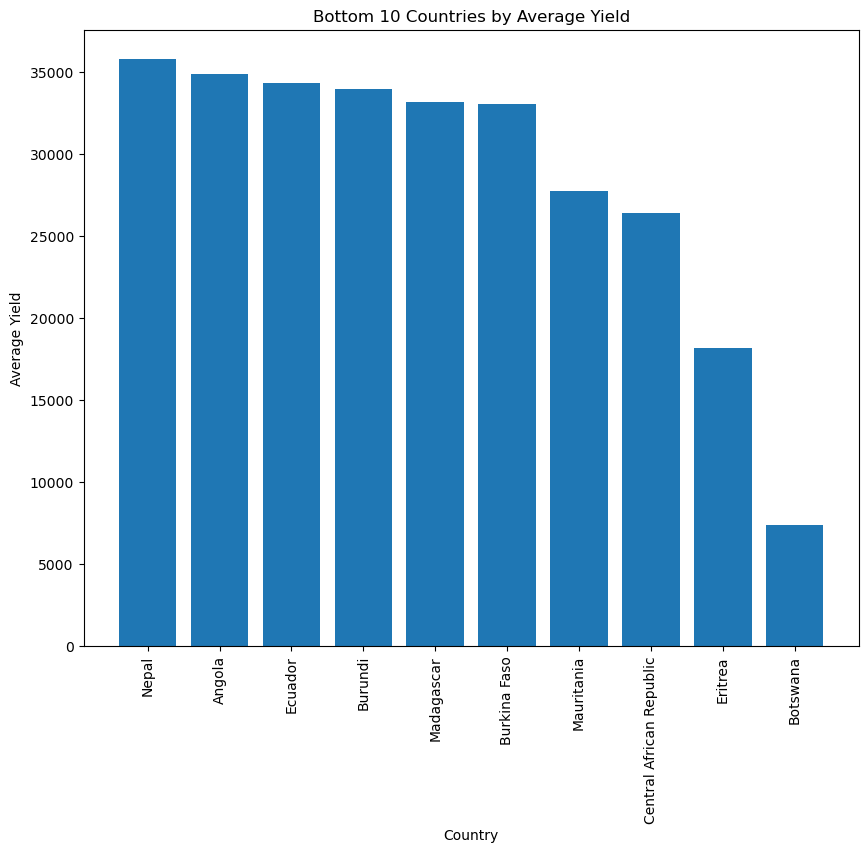

In [73]:
bottom10 = country_yield.tail(10) # Selects the bottom 10 countries from the sorted list

plt.figure(figsize = (10, 8)) # Set figure size to 10 width and 8 height

plt.bar(bottom10.index, bottom10.values) # Plots a bar chart

plt.xticks(rotation=90) # Rotate the xlabel to 90 degrees to avoid overlaping

plt.xlabel("Country") # Set x-axis label as "Country"

plt.ylabel("Average Yield") # set y-axis label to "Average Yield"

plt.title("Bottom 10 Countries by Average Yield") # set title to "Bottom 10 Countries by Average Yield"

plt.show() # displayses the bar chart

***This chart shows the countries with the lowest crop productivity in the dataset.***
These countries:
- Have very low yield levels
- Are mostly lower-income nations
- Likely face limited technology, low fertilizer usage, poor irrigation, and climate stress

# *----------- Insight Summary-------------*

- There is a large productivity gap between advanced farming economies and developing nations.
- This is an important insight because it reveals global agricultural inequality, which could impact food security and policy planning.

## Histogram Plot
***Distribution of Crop Yeild***

Text(0.5, 1.0, 'Distribution of Crop Yeild')

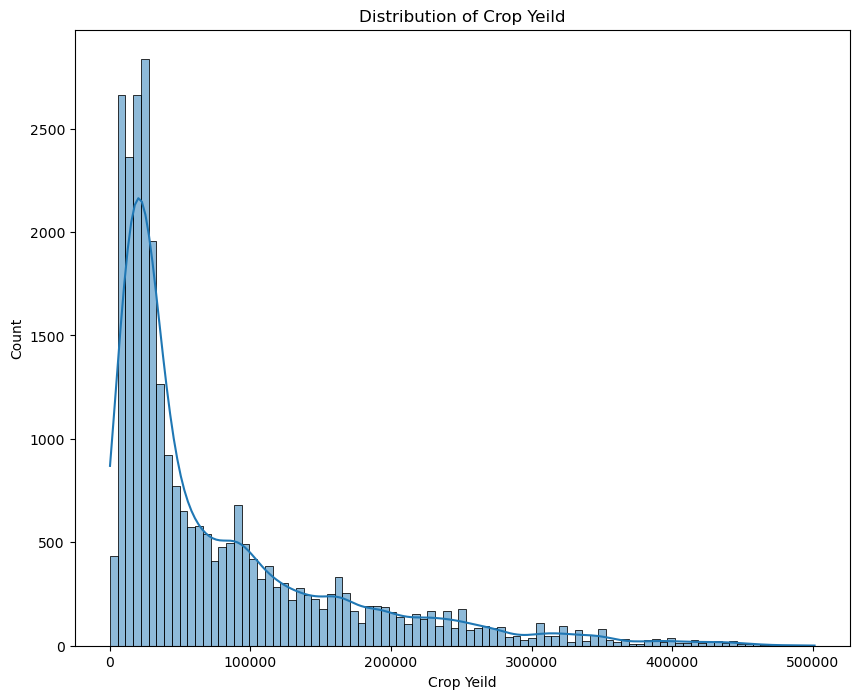

In [74]:
plt.figure(figsize=(10,8)) # Creates a figure (chart area) with a width of 10 and height of 8.

sns.histplot(df['Yield'], kde=True) # Creates a histogram of the Yield column to show how crop yields are distributed.

plt.xlabel("Crop Yeild") # set x-axis label as "Crop Yield"

plt.title("Distribution of Crop Yeild") # set title as "Distribution of Crop Yeild"

- Most crop yields fall within a lower range
- Some countries have very high yields, causing a long right tail
- The “kde curve” shows right-skewness (not a normal distribution)
This means that:
A few highly mechanized countries produce extremely high yields, while the majority still produce at lower levels.

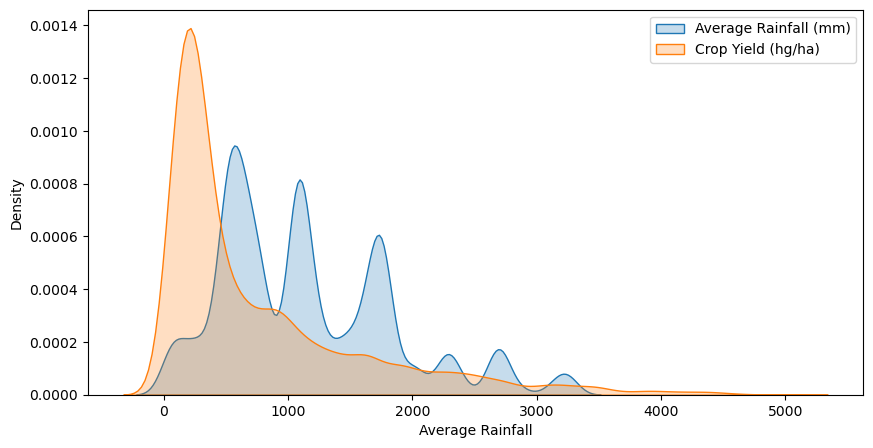

In [75]:
plt.figure(figsize=(10,5)) # Creates a figure with a width of 10 and height of 5.

sns.kdeplot(df["Average Rainfall"], fill=True, label= "Average Rainfall (mm)") # Plots a smooth curve that shows how rainfall 
                                                                    # values are distributed in the dataset.

sns.kdeplot(df["Yield"]/ 100, fill=True,label="Crop Yield (hg/ha)") # Plots a second curve for yield values.
                                                                    # Dividing yield by 100 is done to scale both curves to a similar range 
                                                                    # so they fit visually on the same chart.

plt.legend() # Adds a label for legend.

***Both Rainfall and Yield distributions are shown together***
- There is a visible high peak, many countries fall in this value range
- Also Skewness shows that extreme values exist
- Higher rainfall seem NOT to correlate with higher yields.

## Split and sort countries into 7 groups
This is because a heatmap with 101 countries is:
- Too wide
- Hard to read and
- Overlapping labels

In [76]:
n_chunks = 7 # Divide the list of countries into 7 groups (chunks).

country_size = 101 // 16 # Performs integer division: 101 divided by 16 
                            # This calculates roughly how many countries might fit into each chunk.

countries = sorted(df['Country'].unique()) # Gets a list of unique countries from the dataset, and sorts them in alphabetical order

country_chunks = np.array_split(countries, n_chunks) # Splits the sorted country list into 7 separate groups

# Top Yielding Crops per Country

In [77]:
# Average Features by Country

pd.set_option('display.width', 200)

for i in range(0,7): # this loops through numbers 0 to 6
    
    data = df[df['Country'].isin(country_chunks[i])] # Selects only the rows where the Country belongs to the i-th chunk
    
    d2 = data.groupby('Country')[['Yield', 
                                  'Average Rainfall', 'Pesticides Tonne', 
                                  'Average Temp']].mean().sort_values(by='Yield',ascending=False) # Groups the subset by Country
                                                                                    # Calculates the average for each numerical feature
    
    print(d2, '\n')

                    Yield  Average Rainfall  Pesticides Tonne  Average Temp
Country                                                                    
Belgium     216468.461538             847.0       7358.000769     11.016923
Bahrain     153237.551724              83.0         12.989310     26.703448
Austria     113044.354167            1110.0       3587.785417      9.121979
Australia   112951.409938             534.0      33115.119565     16.593696
Argentina    89304.434783             591.0      67929.460000     17.708478
Belarus      74679.555556             618.0       8407.717619      6.735238
Brazil       73583.797101            1761.0     189736.869565     22.673913
Armenia      71811.111111             562.0        138.646190      9.580952
Bahamas      65443.537313            1292.0        367.613284     25.463582
Algeria      58872.491228              89.0       4226.762982     17.484825
Albania      57692.282828            1485.0        601.238788     16.300101
Bangladesh  

# --------------- Insight ----------------

***Countries with the Highest Yields***
Examples: United Kingdom, Belgium, Denmark, Netherlands, Ireland
These countries have:
- Very high crop yields
- Cool climates (Average Temp ~ 7–12°C)
- Moderate rainfall
- High pesticide usage

***This suggests that advanced farming technology and chemical inputs significantly boost productivity.***

***Well-developed agriculture with balanced climate***
Examples: France, Italy, Germany, New Zealand
Strong productivity may be due to:
- Good rainfall
- Mechanized agriculture
- Efficient pesticide use

***These countries maintain high yields without climate extremes.***
Tropical countries with large agriculture but medium yields
Examples: Brazil, Argentina, Indonesia, India
Despite high rainfall and large farming area:
- Yields are not as high as Europe countries
- Very high pesticide usage in some cases (Brazil!)
***This suggests that productivity challenges exist despite favorable climates, soil limitations, crop type choice, or farming practices.***

***Low-income countries with very low yields***
Examples: Botswana, Burundi, Eritrea, Central African Republic, Angola
Patterns may be due to:
- Very low pesticide usage
- Limited technology
- Often water scarcity or poor irreligation or extreme heat
***Low yields likely linked to resource constraints & limited modern farming support.***

***Very hot desert-climate countries***
Examples: Qatar, Mauritania, Saudi Arabia
Low rainfall + harsh climate or low natural suitability
***This suggest that agriculture depends heavily on irrigation and imports.***

# ----------- Insight Summary --------
***Global crop yield is not mainly driven by climate, it is strongly influenced by technology, pesticides, and farming investment.***
***High-tech nations outperform even tropical regions with ideal weather.***

# Top 3 crops in each country by Yield

***This helps to know Which crops perform best in each country***

In [78]:
for x in range(0,7): # Loops through each of the 7 groups of countries you previously created
    
    for y in range(0, len(country_chunks[x])): # Then loops through each country within the group
        
        crops = df[df['Country'] == str(country_chunks[x][y])].groupby('Crop')[['Yield', 
                                                                                'Average Rainfall', 'Pesticides Tonne',
                                                                                'Average Temp']].mean().sort_values(

                                                                # Filters the data to include only that country and Groups data by Crop
                                                                # Calculates the mean Yield, Rainfall, Pesticide use, and Temperature
                                                                
            by='Yield', ascending=False).head(3) # Sorts crops by highest yield and Selects the Top 3 highest-yielding crops in each country
        
        print(f'Top 3 Crops in {str(country_chunks[x][y])} are \n', crops, '\n') # Prints the results country by country
             

Top 3 Crops in Albania are 
                      Yield  Average Rainfall  Pesticides Tonne  Average Temp
Crop                                                                        
Potatoes     153105.043478            1485.0        637.778696     16.326957
Maize         42664.782609            1485.0        637.778696     16.326957
Rice, paddy   33414.250000            1485.0        121.000000     15.960000 

Top 3 Crops in Algeria are 
                   Yield  Average Rainfall  Pesticides Tonne  Average Temp
Crop                                                                     
Potatoes  182413.956522              89.0       4200.921739     17.488261
Sorghum    53727.045455              89.0       4334.826364     17.470455
Maize      29027.913043              89.0       4200.921739     17.488261 

Top 3 Crops in Angola are 
                        Yield  Average Rainfall  Pesticides Tonne  Average Temp
Crop                                                                        

# --------------- Insight -----------------
This shows that defferent countries have different agricultural strengths based on climate
For instance: 
- Potatoes dominate in colder regions (Europe)
- Cassava and Yams dominate in tropical and sub-Saharan countries
- Rice dominates in high rainfall warm regions (Asia & South America)
- Sorghum outperforms others in hot, dry climates (Africa and Middle East)

# Features Average by Country Plot

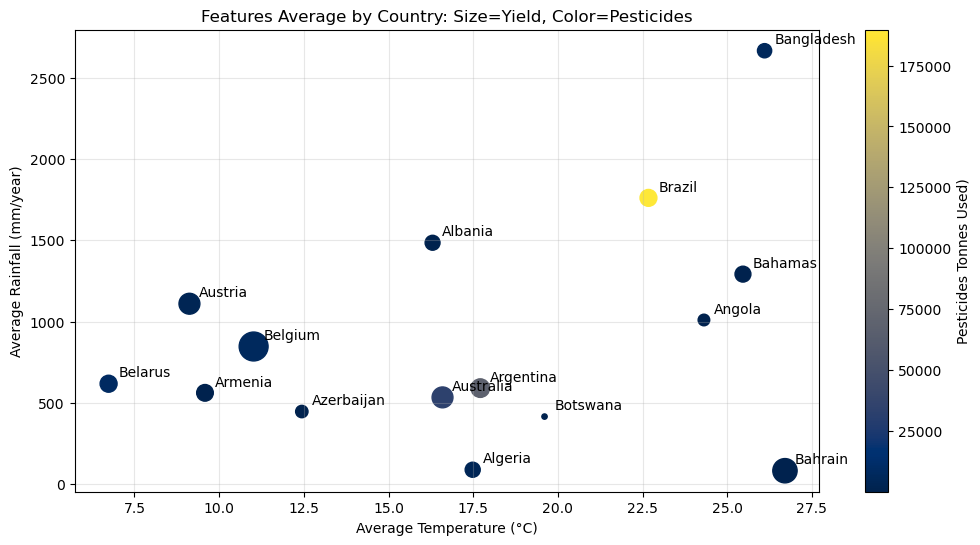

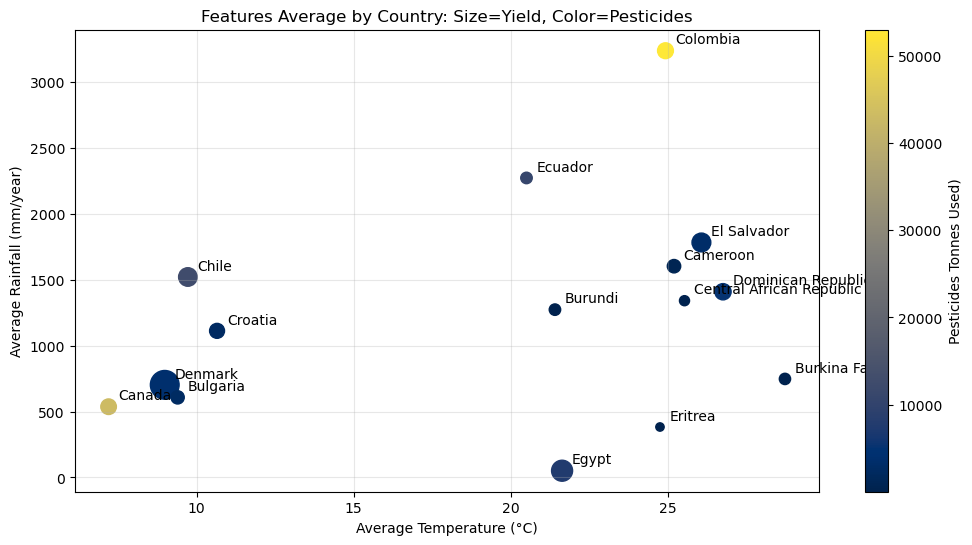

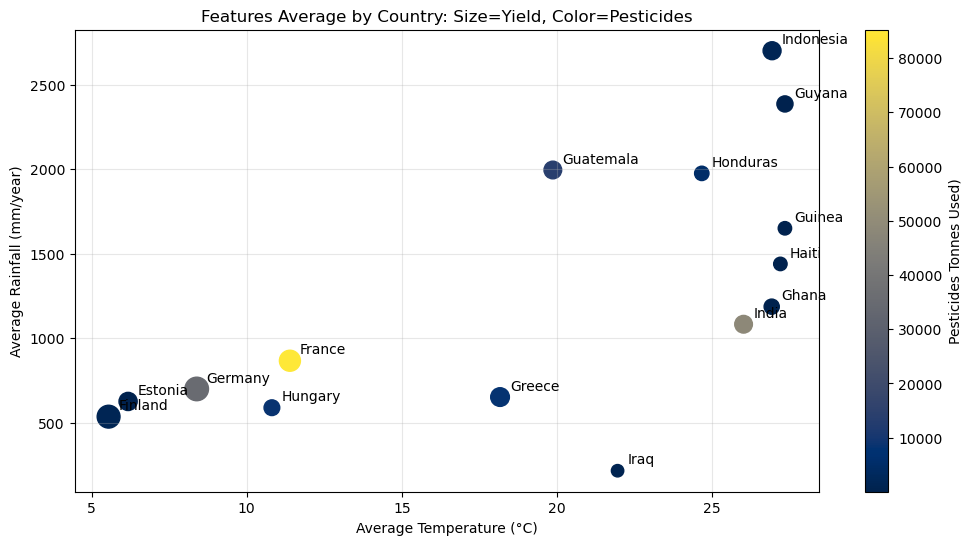

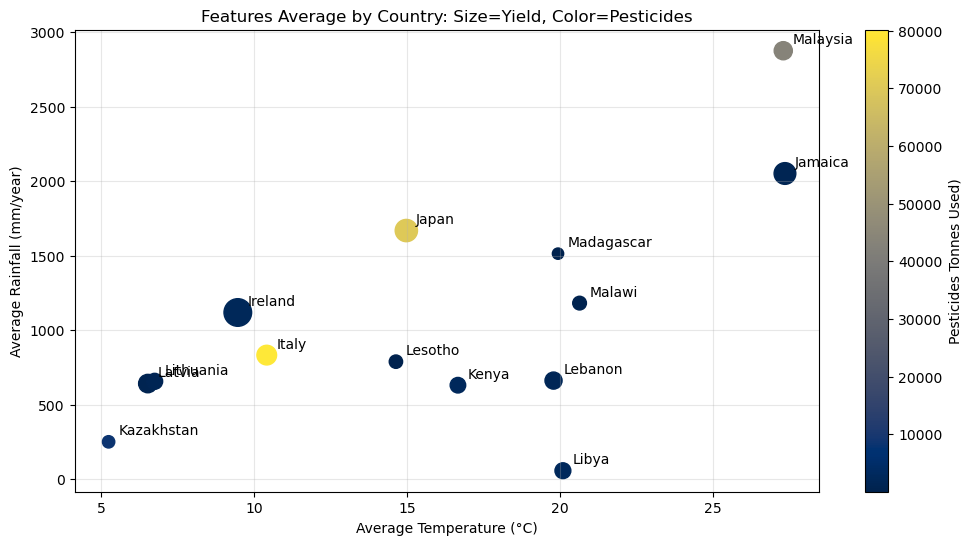

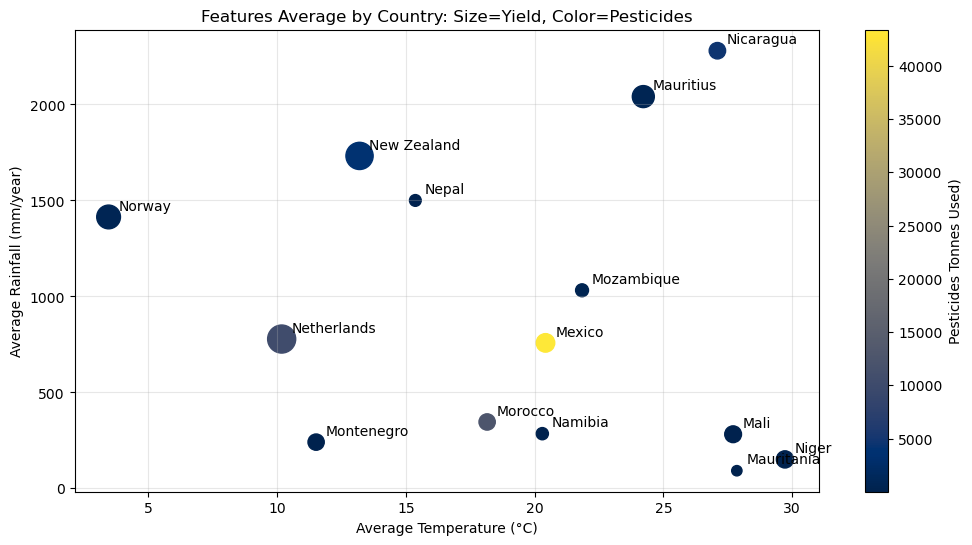

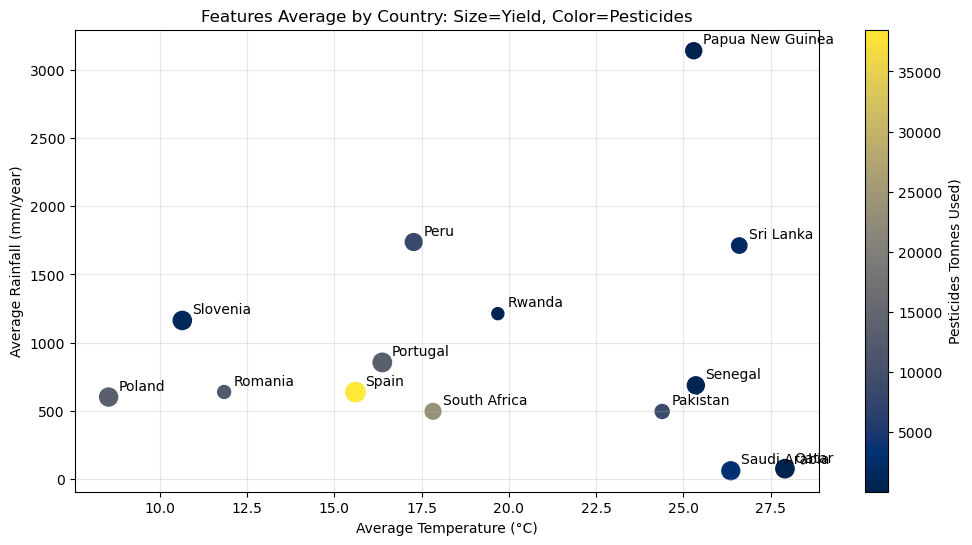

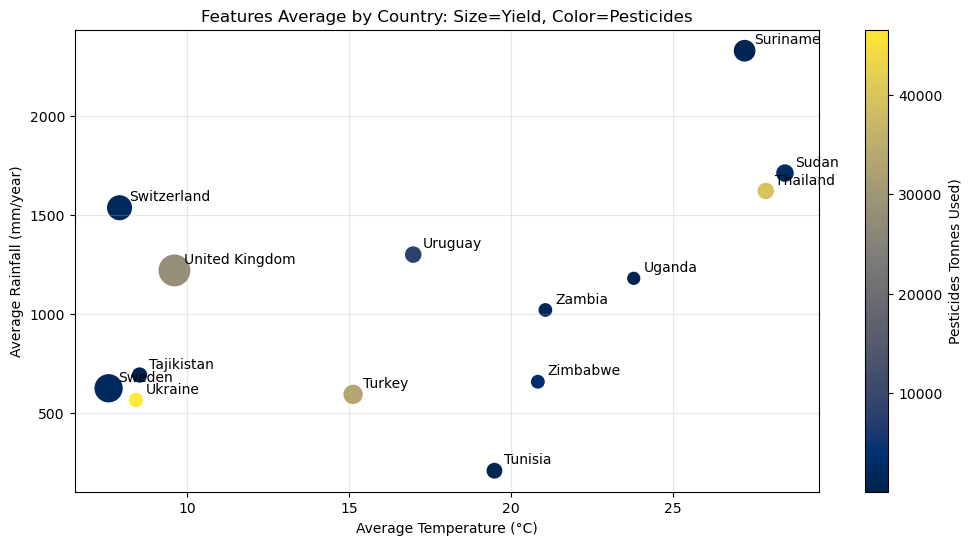

In [79]:
for i in range(0,7): # Repeat the same plotting process 7 times because we split countries into 7 groups
    
    data = df[df['Country'].isin(country_chunks[i])] # Select only the countries that belong to the current chunk/group
    
    d2 = data.groupby('Country')[['Yield', 'Average Rainfall', 'Pesticides Tonne', 'Average Temp']].mean().sort_values(by='Yield',ascending=False)

                    # Group the selected countries by name
                    # Calculate the average value of each feature
                    # Sort the countries in order of highest to lowest average yield
    
    
    plt.figure(figsize=(12,6)) # set the figure to width (12) and height(6) for clearer display
    
    plt.scatter(
        x= d2['Average Temp'], y= d2['Average Rainfall'], s= d2['Yield']/500, c= d2['Pesticides Tonne'],
        cmap='cividis'
    ) # create a scatter plot with x and y label, tempereature and rainfall respectively

    
    for i, country in enumerate(d2.index): # enumerate countries with their index number
        
        plt.annotate(country, (d2['Average Temp'].iloc[i], d2['Average Rainfall'].iloc[i]),
                     
                    textcoords='offset points', xytext=(7,5)) # Offsets text slightly so it doesn't overlap the bubble

    plt.colorbar(label='Pesticides Tonnes Used)') # Shows a color scale that explains what the bubble colors mean

    # Label the x-axis, y-axis and give the chart a title
    
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Average Rainfall (mm/year)')
    plt.title('Features Average by Country: Size=Yield, Color=Pesticides')
    
    plt.grid(True, alpha=0.3) # Add a faint grid for readability
    

# ------------------------------ Insight --------------------

***Each plot shown above represents a different group of countries. Across all 7 charts, this visualization allows us to compare:***
1. Temperature (x-axis)
2. Rainfall (y-axis)
3. Yield size (bubble size)
4. Pesticide use (bubble color)

The 7 charts shows that, There is no single factor that determines crop productivity. Instead:
- Countries with moderate temperature AND moderate-to-high rainfall usually perform better
- Extremely hot or extremely dry countries generally show lower yields.
For examples:
Belgium, Denmark, Ireland, Netherlands, UK has Big bubbles which suggset high yield
Botswana, Niger, Mauritania → Very small bubbles which suggest low yield.

***While..***
Countries above 25°C generally show lower yield even when rainfall is high.
Example countries:
Bangladesh, Colombia, Ghana, Sri Lanka
This means high temp + good rainfall but only medium yield
This suggests that:
Crops have a temperature threshold and heat stress reduces yield.

Some tropical countries receive very high rainfall (>2000mm)
but still show poor–moderate yields.
Examples:
Cameroon, Mozambique, Papua New Guinea
This may be due to excessive rainfall, flooding, low soil quality, and diseases.
This suggest that, High rainfall does not guarantee high yield.

Countries with moderate pesticide application often have higher productivity,
but extreme usage doesn’t always result in higher yield.

Examples:
Brazil, India use huge pesticides, yield still not highest
Belgium, Germany use moderate pesticides, with superior yield performance
This suggest that, pesticide usage increases yield, but only up to a point.

## ------------ Insight Summary --------------- 
***The relationship between temperature, rainfall, and pesticide usage strongly impacts yield.***
- Optimal climate (≈ 10–20°C + moderate rainfall) + controlled input usage gives best productivity
- Very hot climates struggle even with good rainfall.

# Three scatter plots to show how crop yield (hg/ha) varies with:
- Average Rainfall
- Pesticide Use
- Average Temperature

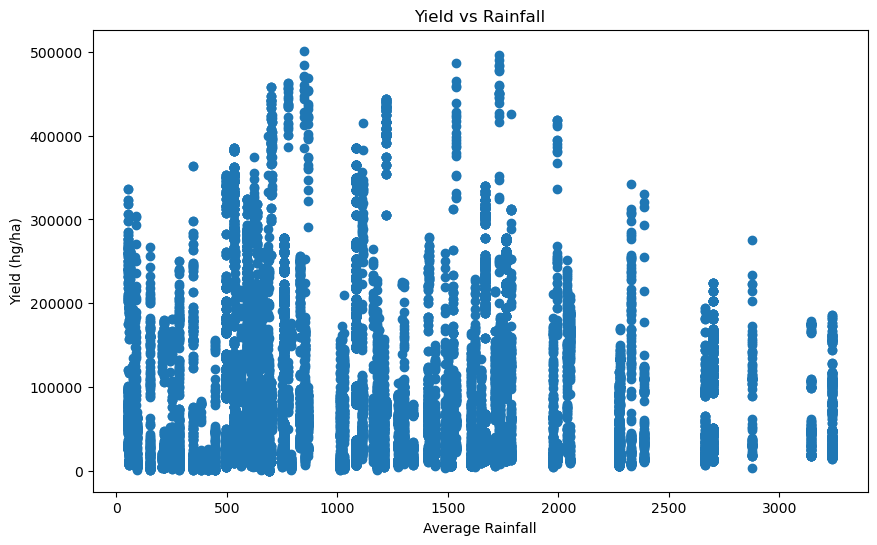

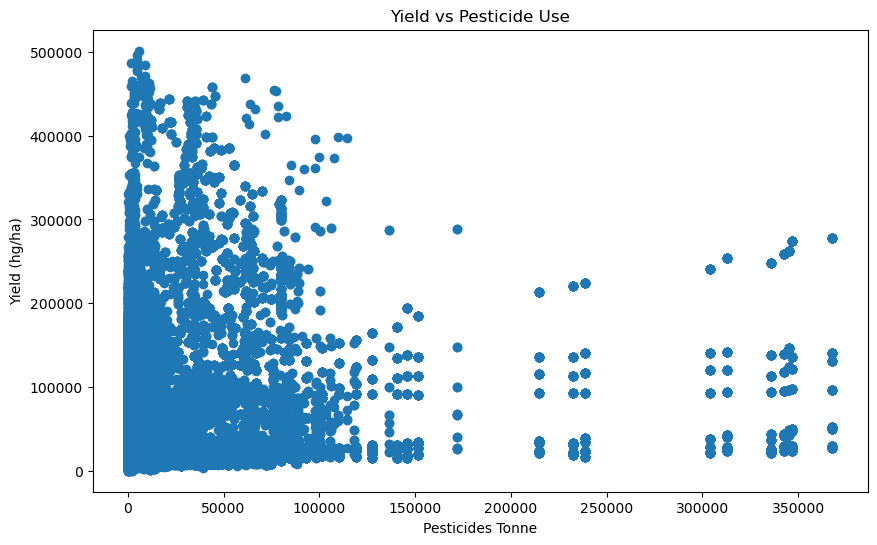

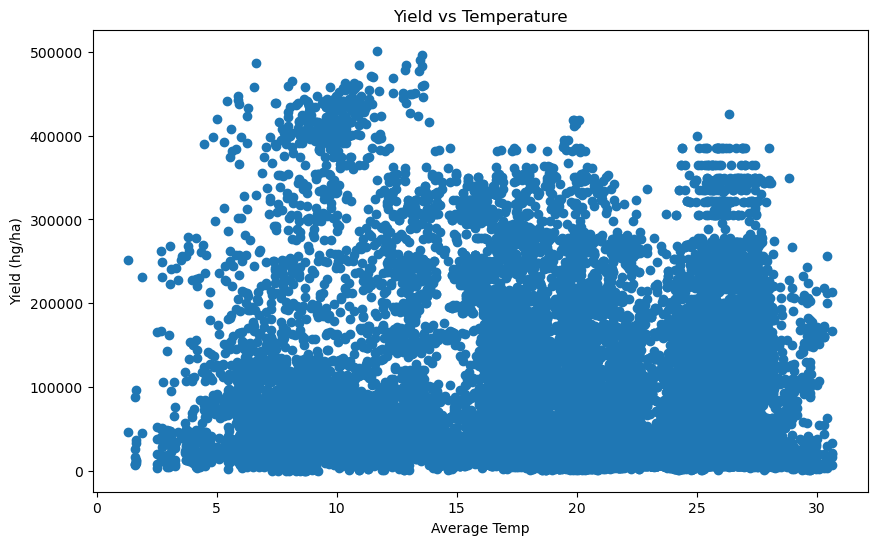

In [80]:
variables = ['Average Rainfall', 'Pesticides Tonne', 'Average Temp'] # Creates a list of independent variables we want to compare with yield

titles = ['Yield vs Rainfall', 'Yield vs Pesticide Use', 'Yield vs Temperature'] # List of plot titles matching each variable

for var, title in zip(variables, titles): # Loops through the variables and their titles at the same time
    
    plt.figure(figsize = (10, 6)) # Creates a new chart with a size of 10 width and hight of 6
    
    plt.scatter(df[var], df['Yield']) # Draws a scatterplot comparing the chosen variable to Yield
    
    plt.xlabel(var) # Labels the X-axis with the current variable name
    
    plt.ylabel('Yield (hg/ha)') # abels the Y-axis with “Yield”
    
    plt.title(title) # Adds a title that matches the variable relationship
    
    plt.show() # Displays the plot


***The above plots help us explore possible relationships between climate/agro-inputs and productivity.***

# -------------- Insight --------------
***Rainfall***: Shows Weak / scattered relationship
- From the three plots shown rainfall alone doesn’t determine yield, too much or too little can both reduce yield. 
- Crop differences matter.

***Pesticides Use***: Shows some positive trend at lower values, flat/chaotic at high values. This means:
- More pesticide does not always mean better yield. Diminishing returns & environmental factors.

***Temperature***: Slight upward trend around 10 - 20°C, decline above 25°C, this shows:
- Optimal temperatures exist, that is, high temperature reduces crop performance.

## Observing Climate Patterns by each Crop

In [81]:
crop_climate = df.groupby('Crop')[['Average Temp','Average Rainfall', 
                                   'Pesticides Tonne', 'Yield']].mean().round(2).sort_values(by='Yield', ascending=False)
                                    # This groups the rows in your DataFrame (df) by each unique crop.

print("Climate preferences by Crop:\n", crop_climate)

Climate preferences by Crop:
                       Average Temp  Average Rainfall  Pesticides Tonne      Yield
Crop                                                                             
Potatoes                     19.01           1060.40          32152.52  199801.55
Cassava                      24.21           1481.13          44181.31  150479.47
Sweet potatoes               22.18           1232.13          39448.29  119057.79
Yams                         22.70           1638.16          71945.98  114140.35
Plantains and others         24.24           1853.93           7931.01  106041.32
Rice, paddy                  21.27           1186.67          36942.22   40730.43
Maize                        19.93           1098.12          32765.98   36310.07
Wheat                        18.13            957.29          35453.21   30116.27
Sorghum                      21.43           1017.18          36742.46   18635.78
Soybeans                     19.66           1110.77          40752.

## -------------------- Insight -------------

**Climate Patterns Observed**

***Temperature***
High-yield crops prefer warmer climates: e.g
- Potatoes: ~19°C
- Cassava: ~24°C
- Sweet Potatoes: ~22°C
- Yams: ~23°C
***They grow well in tropical/subtropical areas.*** while
Low-yield crops prefer cooler climates: e.g
- Wheat ~18°C
- Potatoes also cooler but still very productive.

***Rainfall***
Higher rainfall often supports higher yield: e.g
- Yams: 1638 mm
- Plantains: 1853 mm
- Cassava & Sweet Potatoes: >1200 mm
***Cereal crops like wheat and sorghum thrive in lower rainfall regions, lower yields.***

***Pesticide Usage (Tonnes)***
***Yam:*** 
- Pesticides usage: High usage
- Yield: Lower than top 3
***Plantains:***
- Pesticides usage: Very low
- Yield: Still high yield
***Soybeans***
- Pesticides usage: High pesticide use
- Yield: Low yield

***This implies:***
- Higher pesticide usage doesn’t always mean higher yield.

***This might indicate or due to:***
- Pest-resistant crops perform better e.g., plantains
- Some crops still struggle with pests despite heavy use e.g., yams

## Global Average Yield Trend Per Year

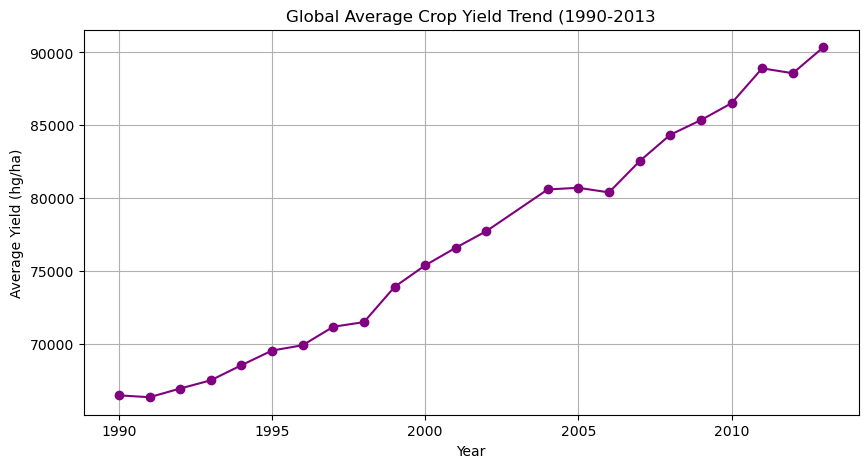

In [82]:
total_yield_by_year = df.groupby("Year")["Yield"].mean() # Groups the dataset by year and
                                                         # Calculates the average crop yield for each year globally

plt.figure(figsize= (10, 5)) # Creates a line chart of 10 width and 5 height

total_yield_by_year.plot(kind="line", marker = "o", color = "purple") # Shows the change in global average crop yield from 1990–2013

plt.title("Global Average Crop Yield Trend (1990-2013") # label title

plt.xlabel("Year") # label x-axis as "Year"

plt.ylabel("Average Yield (hg/ha)") # label y-axis as "Average Yield (hg/ha)"

plt.grid(True) # Shows grid lines to make the trend easier to read


# -------- Insight -------------
***This plot shows the global progress in food production***

***Yield generally increases over the time***

# Bar Chart Showing Top Countries for Each Crop Yield

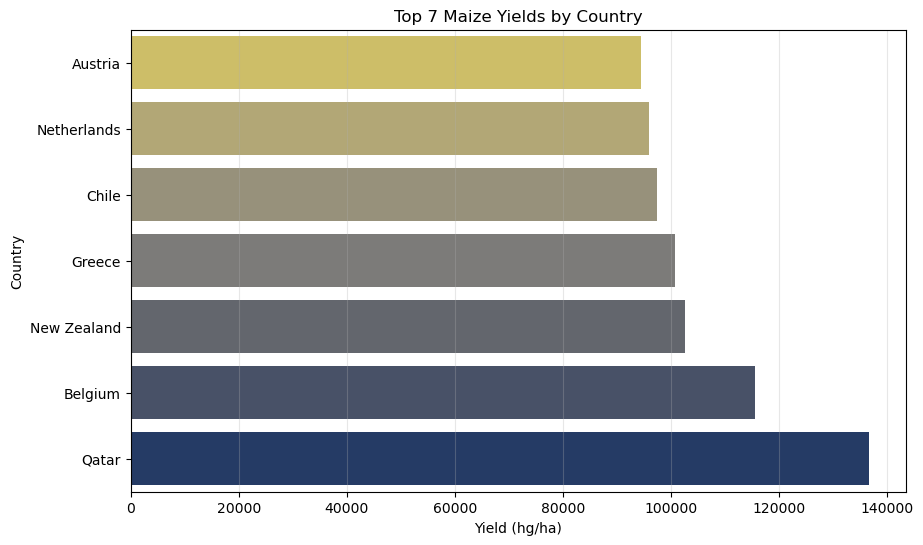

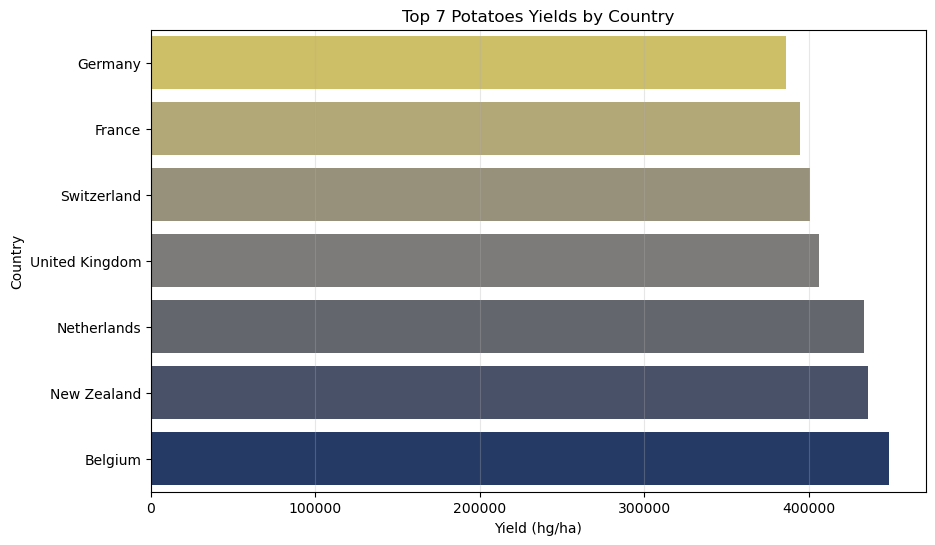

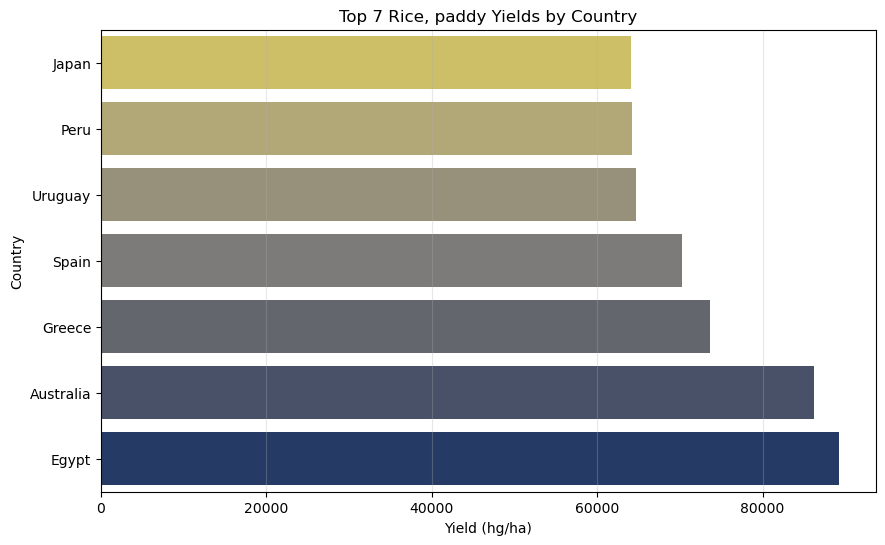

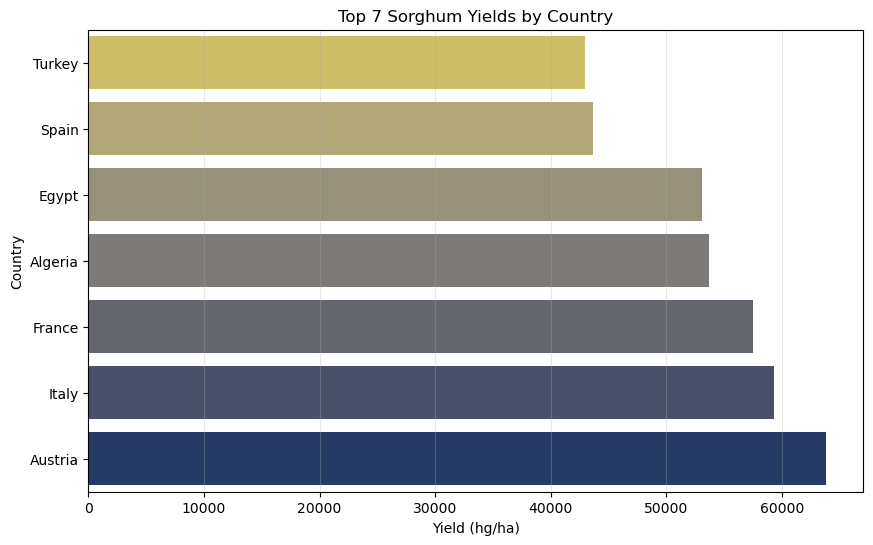

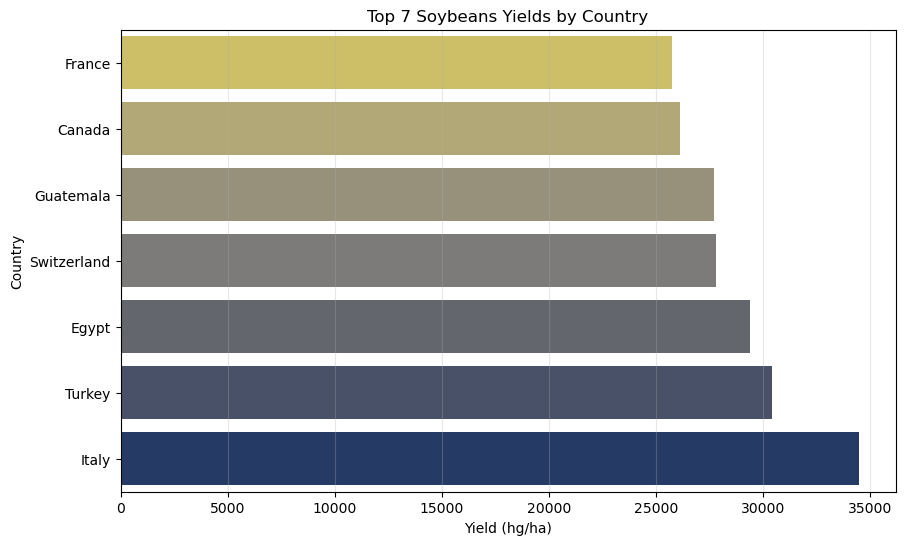

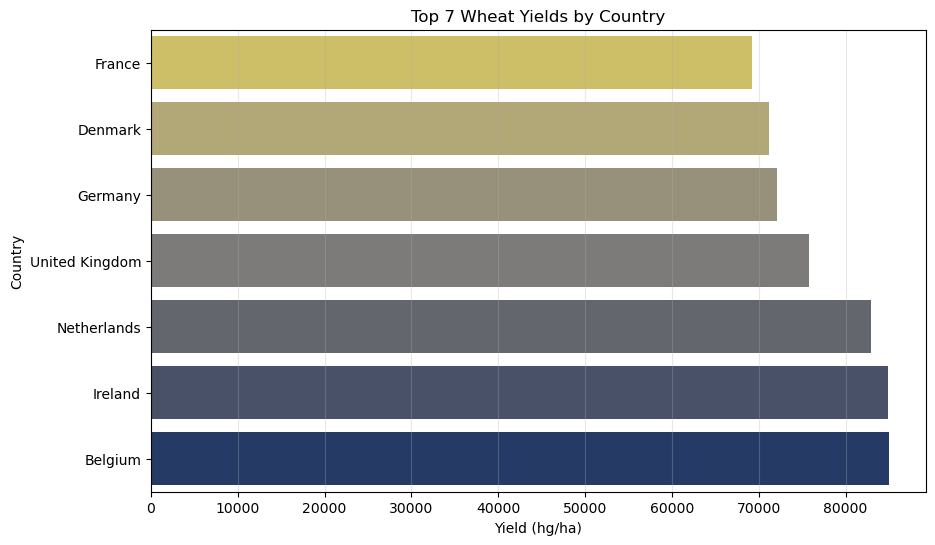

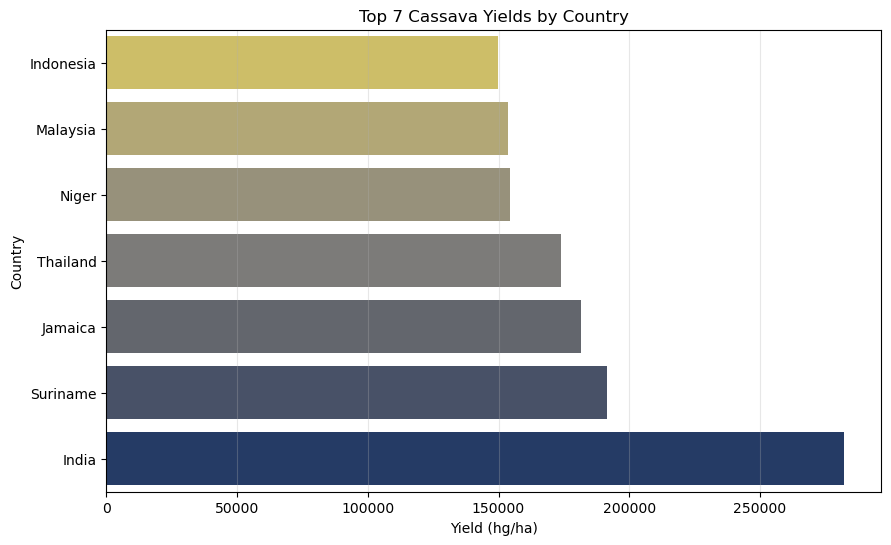

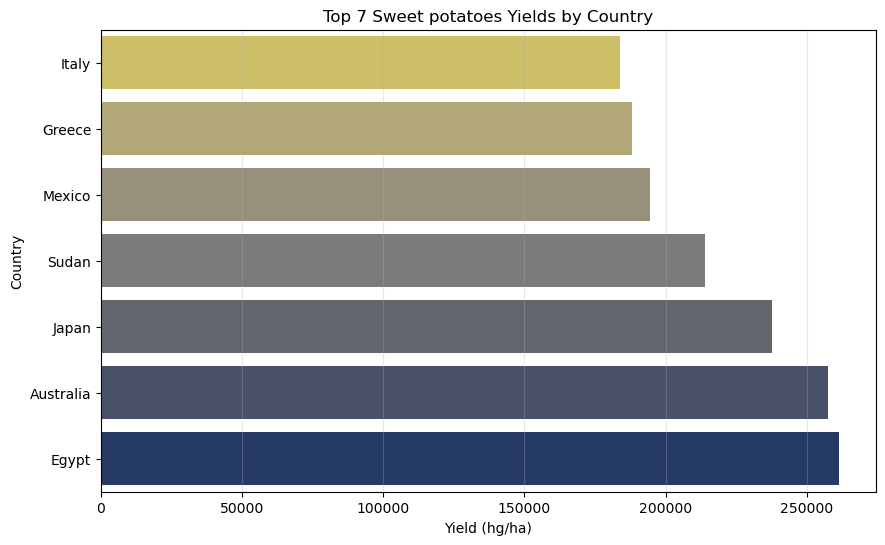

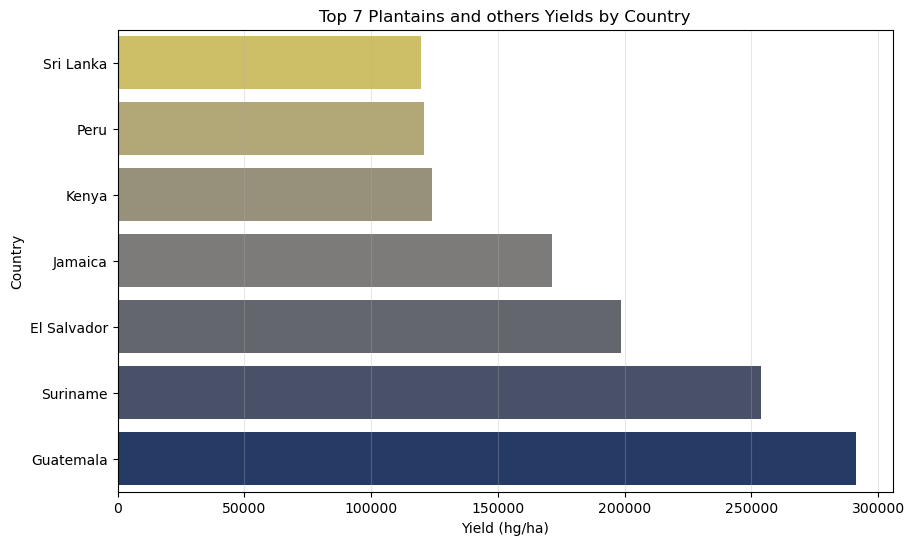

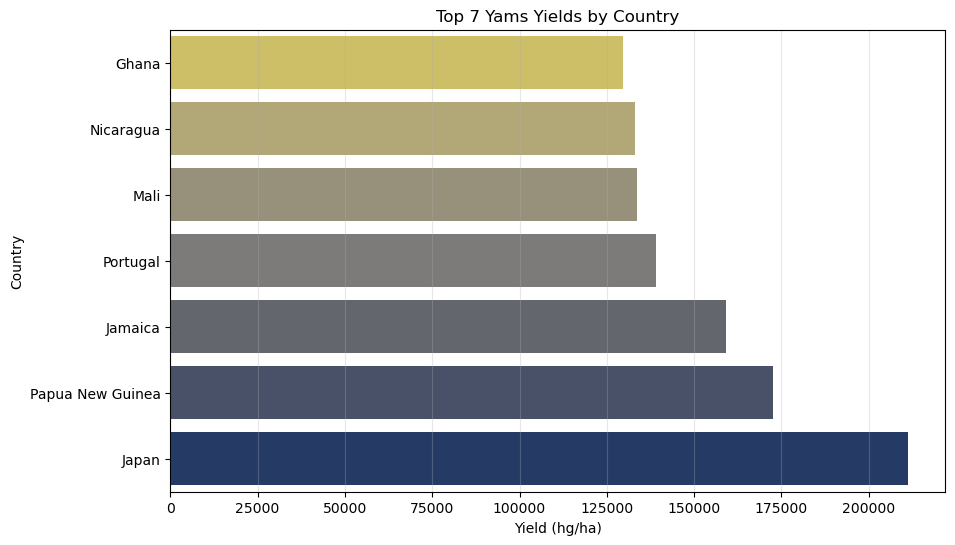

In [83]:
for i in range(0,10):
    crop_yield = df[df['Crop'] == list(df['Crop'].unique())[i]].groupby('Country')['Yield'].mean().sort_values(ascending=False).head(7).to_frame()

    plt.figure(figsize=(10, 6))
    
    sns.barplot(y=crop_yield.index, x=crop_yield['Yield'], data=crop_yield, palette='cividis', orient='h')
    
    plt.xlabel('Yield (hg/ha)')
    
    plt.title(f'Top 7 {list(df['Crop'].unique())[i]} Yields by Country')
    
    plt.gca().invert_yaxis()  # Highest yield at top
    
    plt.grid(axis='x', alpha=0.3)
    
    

# Correlation Between Environmental Factors and Yield

Correlation with Yield:
Yield               1.000000
Pesticides Tonne    0.064085
Average Rainfall    0.000962
Average Temp       -0.114777
Name: Yield, dtype: float64


Text(0.5, 1.0, 'Correlation Between Environmental Factors and Yield')

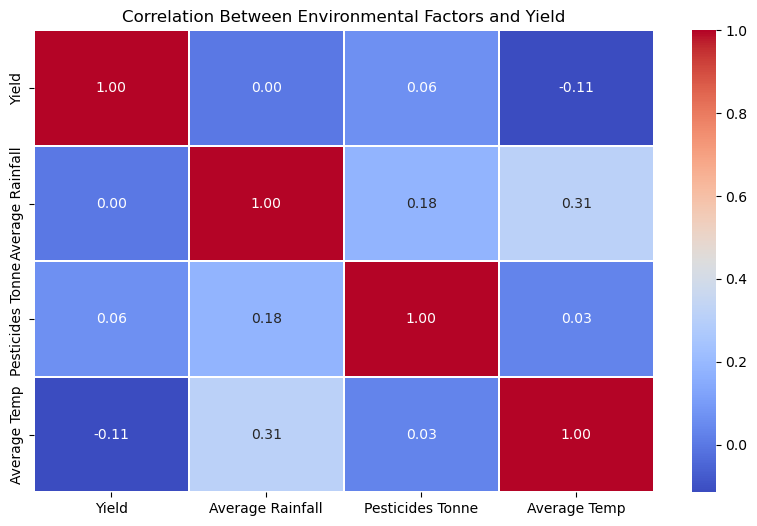

In [84]:
numerical_cols = ["Yield", "Average Rainfall", "Pesticides Tonne", "Average Temp"] # You define a list of numeric features to analyze for correlation.

correlation_matrix = df[numerical_cols].corr() # Calculates the correlation coefficient matrix

print("Correlation with Yield:") # Then prints correlations of all features
print(correlation_matrix["Yield"].sort_values(ascending=False)) # ranked by strongest to weakest relationship with Yield

plt.figure(figsize=(10,6)) # Set figure size to 7 width and 6 height

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", lw=1.3) # Creates a heatmap to visualize relationships

plt.title("Correlation Between Environmental Factors and Yield") # set title as "Correlation Between Environmental Factors and Yield"


# ------------------ Interpretation ---------------
- A positive value means yield increases with the feature.
- A negative value means yield decreases with the feature.
- Values close to 1 or -1 indicate strong relationships.
- blue = negative, red = positive

# ------------------ Insight ---------------

Feature: ***Pesticides Tonne***

***Correlation = +0.064***
- This suggest that, there is a Very weak positive relationship, that is, pesticides have almost no direct effect on yield here.
  
Feature: ***Average Rainfall***

***Correlation = +0.001***
- This implies that there is no relationship with yield.
  
Feature: ***Average Temp***

***Correlation = –0.115***
- This implies that there is a weak negative relationship, that is, higher temperatures slightly reduce yield.
  
Feature: ***Yield***

***Correlation = 1.0***
- Self correlation, always = 1

## ***--------------- Insight Summary ---------------***
***This dataset suggests that:***
- Environmental factors alone do not strongly explain yield variation
- Yield is likely influenced by factors missing not recorded in this dataset, such factors could be:
    - Fertilizer usage
    - Soil quality
    - Crop type differences
    - Farming techniques / mechanization
    - Region-specific variations
    - Technology improvements
However, Temperature is the only factor showing a slight meaningful trend.

---

# Outliers

***Checking for outliers:***
***This helps visualize the distribution, spread, and outliers of numerical features:***
- Shows which features have extreme values or skewness
- Helps decide if outlier removal is needed
- Useful for understanding data quality

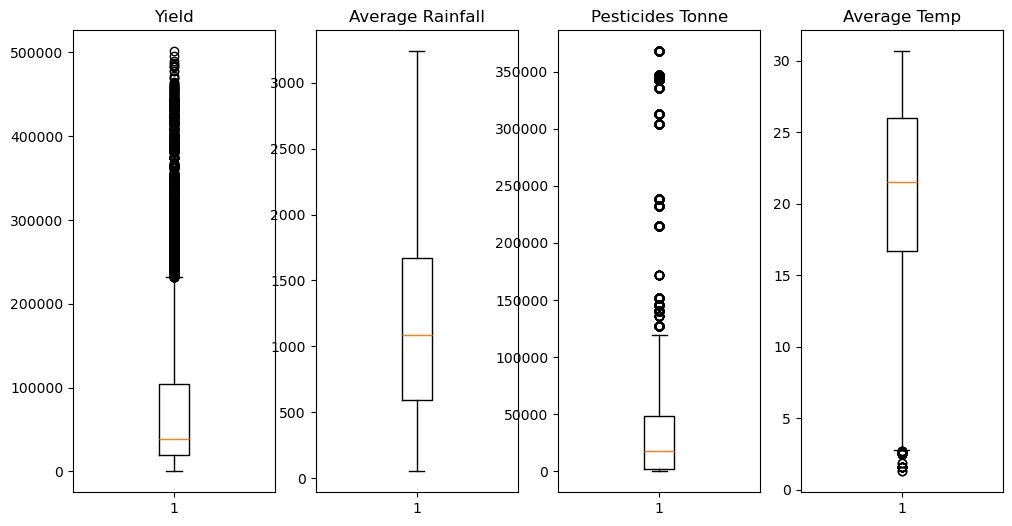

In [85]:
fig, ax = plt.subplots(1,4,figsize=(12, 6)) # Creates a figure with 1 row and 4 subplots (side-by-side) 
                                                # and sets the figure size to 12 width and 6 height

for i, c in enumerate(numerical_cols): # Loops through each numeric column while tracking its index (i)
    
    ax[i].boxplot(df[c]) # Plots a boxplot of that feature on its corresponding subplot
    
    ax[i].set_title(c) # Titles each subplot with the column name

## ***---------------- Insight -----------------***

- Yield & Pesticides both have many outliers: sign of large inequality in farming inputs.
- Rainfall shows skew: desert & tropical climates both present in dataset.
- Temperature shows a more consistent range: most food crops grow in moderate–hot climates.

# **Handling Outliers**
***Removing Extreme Outliers***

In [86]:
for col in numerical_cols:
    q1, q3 = np.percentile(df[col], [25,75])
    IQR = q3 - q1

    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR

    df[col] = np.clip(df[col], lower, upper)


# Outliers Re-check

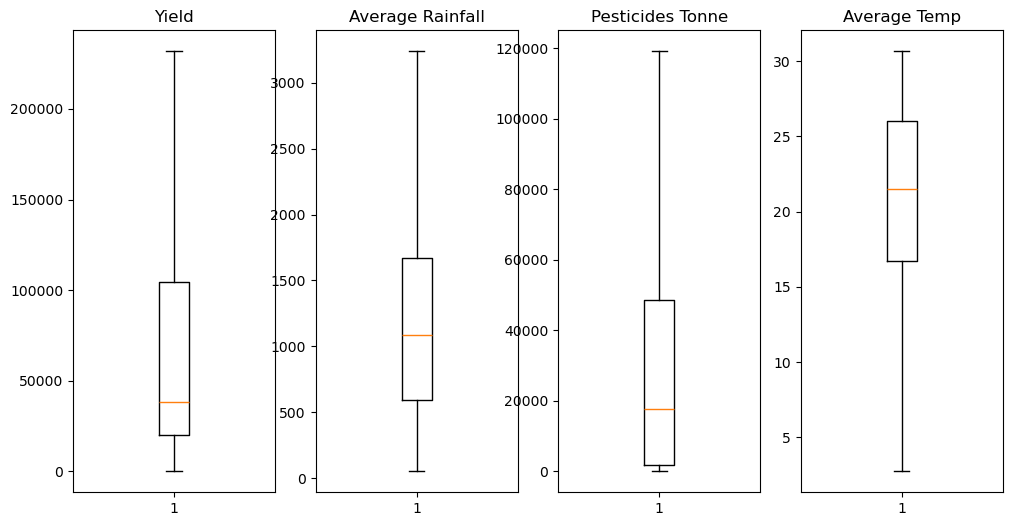

In [87]:
fig, ax = plt.subplots(1,4,figsize=(12, 6))

for i, c in enumerate(numerical_cols):
    ax[i].boxplot(df[c])
    ax[i].set_title(c)
    

---

# Model Training

In [88]:
df_model = df.copy() #  Create a duplicate of the main dataframe for modeling purposes

df_model.head() # Display the first five rows of the duplicated dataframe to verify successful copy

,Country,Crop,Year,Yield,Average Rainfall,Pesticides Tonne,Average Temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## Import key preprocessing and modeling libraries from scikit-learn

In [131]:
# StandardScaler: standardizes numerical features by removing the mean and scaling to unit variance
# LabelEncoder: converts categorical labels into numeric form for modeling

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Evaluation metrics to assess model performance

from sklearn.metrics import r2_score, root_mean_squared_error 

# train_test_split: Splits the dataset into training and testing subsets
# GridSearchCV: performs hyperparameter tuning using cross-validation

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# RandomForestRegressor: ensemble machine learning algorithm used for regression tasks

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.svm import SVR # uses support vector machines to perform regression by fitting the best hyperplane

from sklearn.linear_model import Lasso, Ridge # A linear regression models with L1 and L2 regularization respectively to reduce overfitting


## Encoding Categorical Columns

In [90]:
encode = LabelEncoder() # Initialize the label encoder

for col in ['Country', 'Crop']:
    df_model[col] = encode.fit_transform(df_model[col]) # Apply label encoding to each specified categorical column

df_model.head() # Display the first few rows to confirm successful encoding

,Country,Crop,Year,Yield,Average Rainfall,Pesticides Tonne,Average Temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37


***The above step transforms categorical variables (Country and Crop) into numeric values using LabelEncoder.
Each unique category (e.g., each country name or crop type) is replaced by an integer, for instance, “United Kingdom” might become 0, “Albania” = 1, etc.
This transformation enables the regression model to process these variables mathematically while preserving the mapping of each category.
The head() output confirms that both columns have been successfully converted from text to numerical form, showing integers instead of string labels.***

## Standardize the feature variables and prepare data for model training

In [91]:
scale = StandardScaler() # Initialize the scaler to normalize feature values

X = scale.fit_transform(df_model.drop('Yield', axis=1))
y = df_model['Yield'] # Separate the independent variables (X) and the dependent variable (y)
                        # 'Yield' is the target variable we want to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

# Split the dataset into training and testing sets
# 80% for training, 20% for testing
# random_state ensures reproducibility of results

##  Generate predictions and evaluate model performance on the test set

## Comparing multiple models

In [94]:
models = {
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),
}

In [95]:
# Computing R2 and RMSE

results = {} # Empty dictionary to hold RMSE and R2 scores for each model

for name, model in models.items(): # Loop through each model in the dictionary
    
    model.fit(X_train, y_train) # Train the model on the training data
    
    y_pred = model.predict(X_test) # Predict target values using the test data
    
    rmse = root_mean_squared_error(y_test,y_pred) # Measures average prediction error
    
    r2 = r2_score(y_test, y_pred) # Measures explanatory power (0–1)
    
    results[name] = {"RMSE": rmse, "R2":r2} # Store both metrics in the results dictionary for later comparison


In [96]:
results_df = pd.DataFrame(results).T.sort_values(by="RMSE") # Convert the results dictionary to a pandas DataFrame

print(results_df) # Print result in DataFrame

                                RMSE        R2
Random Forest            8359.554882  0.985464
Gradient boosting       27263.891110  0.845386
Lasso Regression        66697.834966  0.074673
Ridge Regression        66697.846234  0.074673
Support Vector Machine  76883.262860 -0.229520


# -------------------------- Insight --------------------

***Random Forest***
- ***RMSE*** = 8,289.53: Very low error.
- ***R2:*** = 0.9857: 98.6% of yield variation.
This is an excellent fit. It seems to captures almost all relationships between yield and features (rainfall, temperature, pesticides).
It performs best because it can model nonlinear interactions and handle outliers effectively.

***Gradient Boosting***
- ***RMSE***= 27,263.77: Higher error.
- ***R2***= 0.8454: 84.5% of variation.
Still a strong model, but not as good as Random Forest.
It’s more sensitive to parameter tuning and may need more trees or learning rate adjustments for optimal performance.

***Lasso Regression***

- ***RMSE*** = 66,697.83: High error.
- ***R2*** = 0.0747: 7% of variation.
A poor fit, the linear assumption doesn’t capture the complex relationships between climate and yield.
Lasso also performs feature selection, which might have oversimplified the model.

***Ridge Regression***
- ***RMSE*** = 66,697.85: Almost identical to Lasso.
- ***R2*** = 0.0747: Also very low
Same as Lasso, the linear model can’t explain the variability in yield.
Ridge helps with overfitting but doesn’t improve linear limitations.

***upport Vector Machine (SVR)***
- ***RMSE*** = 76,883.26: Largest error.
- ***R2*** = -0.2295: Negative value means it performs worse than a horizontal line.
SVR completely failed to generalize. Possibly due to:   
- Lack of feature scaling  because SVR is sensitive to that,     
- Or too much noise in large data.   

## -------------------------- Summary -------------------
***Random Forest:*** This is seems to be the best predictive model for crop yield in this dataset.    
***Gradient Boosting:*** Performs well, but could improve with hyperparameter optimization.   
***Lasso Regression:*** Not suitable for this nonlinear dataset.   
***Ridge Regression:*** Poor model performance, likely because yield–climate relationships are nonlinear.   
***upport Vector Machine (SVR):*** Performed very poor, might be due to tuning and scaling, because SVR perform well with turning & scaling

## Re-train the Random Forest Regressor using default hyperparameters

In [97]:
rand_forest_model = RandomForestRegressor() # Initialize the model with default settings


rand_forest_model.fit(X_train, y_train) # Fit the model on the training dataset

RandomForestRegressor()

In [93]:

predicted = rand_forest_model.predict(X_test) # Use the trained Random Forest model to predict crop yield for unseen (test) data

print("Model's R2 Score is", r2_score(y_test, predicted)) # Evaluate the model's accuracy using R2 Score and Root Mean Squared Error (RMSE)

print("Model's RMSE is", root_mean_squared_error(y_test, predicted)) 

Model's R2 Score is 0.9859724630108739
Model's RMSE is 8212.110634935572


***This step assesses how well the trained Random Forest model performs on unseen data:***

***R2 Score (Coefficient of Determination):***
- Measures how much of the variance in the target variable (Yield) is explained by the model.
- A score close to 1 indicates an excellent fit.
- A score near 0 means the model performs poorly.

***RMSE (Root Mean Squared Error):***
Represents the average difference between predicted and actual yields.
- Lower RMSE values indicate more accurate predictions.

The model achieved an R2 score of approximately 0.986, meaning that about 98.6% of the variation in crop yield is explained by the input features (such as rainfall, temperature, pesticide usage, etc.), indicating that the Random Forest model fits the data extremely well.

## Create a comparison DataFrame showing actual vs predicted values and their residuals

In [98]:
model_result = pd.DataFrame({'Actual':y_test, # True yield values from the test dataset
                             
                             'Predicted':predicted,  # Model-predicted yield values
                             
                             'Residual':(y_test-predicted) # Difference between actual and predicted values (error term)
                            
}) 

model_result.head(10) # Display the first 10 observations to inspect prediction performance


,Actual,Predicted,Residual
4382,26365,26543.382107,-178.382107
158,33480,28339.929448,5140.070552
27876,90000,91695.552650,-1695.552650
9225,122812,121369.476324,1442.523676
14456,36070,36084.766994,-14.766994
14062,24784,24804.727476,-20.727476
5060,83373,70984.071194,12388.928806
17329,44042,46497.531601,-2455.531601
5944,130482,126867.732000,3614.268000
27957,11333,11586.983000,-253.983000


# ----------------------------------- Insight ---------------------

***This model demonstrates excellent predictive performance***   
- The predicted values are close to the actual yields.   
- Residuals are small and evenly distributed around zero, confirming that the model generalizes well to unseen data.   
This result aligns perfectly with the earlier metrics of R2 that is ***≈ 0.986*** and low RMSE, proving that the Random Forest model is reliable, accurate, and well-calibrated for yield prediction.

## Scatter Plot: Visualize the relationship between actual and predicted crop yields

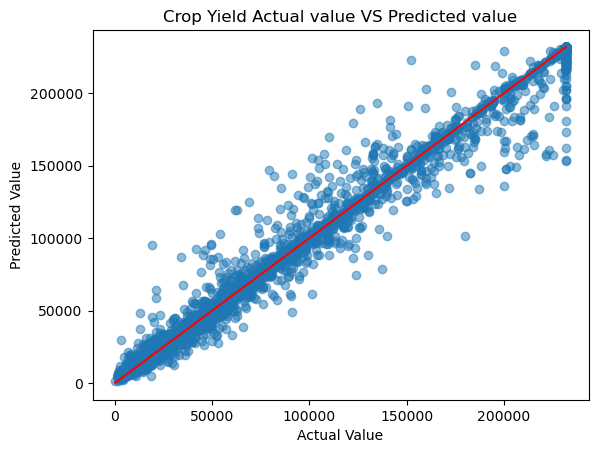

In [99]:
plt.scatter(y_test, predicted, alpha=0.5) # Scatter plot showing how close predicted values are to actual values
                                        # alpha=0.5 adds transparency to make overlapping points visible

plt.title('Crop Yield Actual value VS Predicted value') # add title

plt.xlabel('Actual Value') # add label to x-axis

plt.ylabel('Predicted Value') # add label to y-axis

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red") # Add a red reference line (y = x) for perfect prediction alignment

***From the above plot, we observed that there is a closely clustered around the red line, confirming that the Random Forest model predicts crop yields very precisely with minimal error across most observations.***

# Calculating the 95% confidence interval range for the residuals

In [100]:
# Residual Analysis

print(f"95% of residuals fall between: "
      f"{np.percentile(model_result['Residual'], 2.5):.1f} and "
      f"{np.percentile(model_result['Residual'], 97.5):.1f}")

95% of residuals fall between: -14974.5 and 15511.7


***Residual Analysis Report***

- Yield Range: 50 to 230,000 (massive 229,950 range)

- 95% Residuals: ±~15,000

- Relative Error: Only ~6.5% of the total data range

***Model looks Excellent, that is to say the model is reliable and unbiased***   

## Plot the distribution of residuals to visually assess model prediction errors

Text(0.5, 1.0, 'Distribution of Residuals')

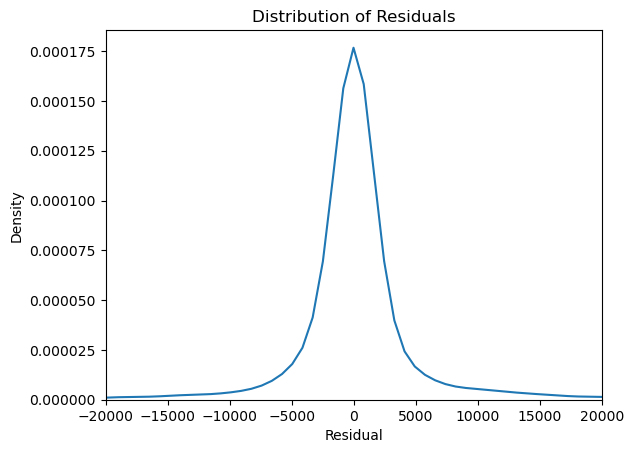

In [101]:
plt.xlim(-20000, 20000)  # Limit the x-axis to focus on the central range of residuals

sns.kdeplot(model_result['Residual'])  # Plot the kernel density estimate of residuals

plt.title('Distribution of Residuals')  # Add a descriptive title

***The above plot shows the residuals are symmetrical, centered near zero, and within the range -15,000 to +15,000.  
This suggest that the Random Forest model demonstrates strong predictive accuracy and low systematic error, confirming it generalizes well to unseen data, and unbais.***

# ------------------------ Features Importance -------------------------
### Determining which features contribute most to the Random Forest model's predictions

In [110]:
feature_importance = pd.DataFrame({
    'Features': df.drop('Yield', axis=1).columns,      # List of all predictor variables (excluding the target)
    
    'Importance': rand_forest_model.feature_importances_           # Extract feature importance scores from the trained model
    
}).sort_values(by='Importance', ascending=False)        # Sort features by importance in descending order

                    
feature_importance # Display the feature importance table


,Features,Importance
1,Crop,0.689335
4,Pesticides Tonne,0.091897
3,Average Rainfall,0.068738
5,Average Temp,0.065455
0,Country,0.062712
2,Year,0.021863


## Visualizing the feature importance scores using a horizontal bar chart

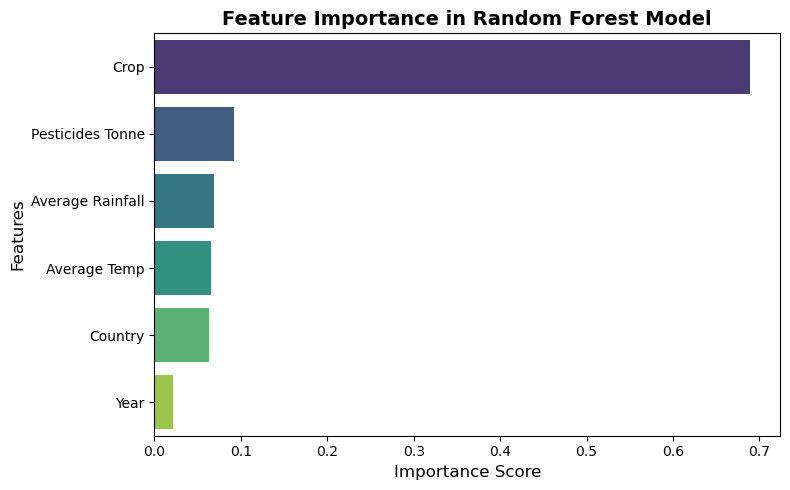

In [115]:
plt.figure(figsize=(8, 5))  # Set figure size for clarity

# Create a horizontal bar plot
sns.barplot(
    data=feature_importance,
    x='Importance',
    y='Features',
    palette='viridis'  # Use a visually appealing color gradient called viridis
)

plt.title('Feature Importance in Random Forest Model', fontsize=14, weight='bold') # set title and font size

plt.xlabel('Importance Score', fontsize=12)

plt.ylabel('Features', fontsize=12)

plt.tight_layout()

plt.show()


## -------------------------------- Insight ----------------------

The feature ***“Crop”*** highly dominates the model, contributing nearly ***69%*** of the predictive power.  
This indicates that the type of crop grown is the single strongest determinant of yield differences in the dataset.   

***“Pesticides Tonne”***, ***“Average Rainfall”***, ***“Country”***, and ***“Average Temp”*** have moderate and fairly similar influence, suggesting that environmental and regional factors also affect yield, but not as strongly as crop type.

***“Year”*** has very low importance of ***~2%***, implying that temporal trends or year-to-year changes do not significantly impact yields within the dataset, possibly due to stable agricultural practices or consistent climate conditions across years.

## -------------- Insight Summary ---------------------
***The above feature ranking provides strong practical insight that suggests that strategic crop selection and agro-environmental management (especially pesticide and rainfall optimization) are key factors for improving agricultural yield outcomes.***  

# Hyperparameter Tunning
***Random Forest Model Ultimization***

In [111]:
rand_forest_model.get_params() # Display all current hyperparameter settings of the trained Random Forest model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [112]:
# define a parameter grid

param_grid = {'n_estimators': [100, 200, 300], 
             'max_depth': [None, 10, 15, 20],
               'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2]
             }

In [113]:
# Initialize gridsearch

grid_search = GridSearchCV(estimator= rand_forest_model, param_grid = param_grid, scoring = 'r2', cv=3, n_jobs= -1 )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [116]:
grid_search.best_params_ # getting the best grid search

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

## Tunning the new model

In [118]:
tuned_model = grid_search.best_estimator_

tuned_pred = tuned_model.predict(X_test)

print(r2_score(y_test, tuned_pred))

0.9857800988203487


## Using Randomize Search

In [119]:
# define a parameter grid

param_grid = {'n_estimators': [100, 200, 300, 400, 500], 
             'max_depth': [None, 10, 15, 20],
               'min_samples_split': [2, 3, 4, 5, 6, 7],
              'min_samples_leaf': [1, 2]
             }


In [121]:
# Initializing randomizedsearch

rand_search = RandomizedSearchCV(
    estimator=rand_forest_model,
    param_distributions=param_grid, 
    scoring='r2',
    cv=4,
    n_iter=20,    # how many random combos to test
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 15, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')

In [128]:
rand_search.best_params_ # getting the best random search

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [127]:
tuned_model = rand_search.best_estimator_

tuned_pred = tuned_model.predict(X_test)

print(r2_score(y_test, tuned_pred))

0.9860492643953335


# Cross Validation on Random Forest Model

- This will help the model generalize well to reduce overfitting on the training data

In [132]:
# Initializing

rand_forest_model = RandomForestRegressor(random_state = 42)

scores = cross_val_score(rand_forest_model, X_train, y_train, cv=5, scoring = 'r2')

print(scores)

[0.98473034 0.98440988 0.98395856 0.98407294 0.98527854]


***This divide the training data into 5 sets***

## Fitting r2 score on the model we validated on before predicting

In [133]:
rand_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Predicting

In [137]:
rand_forest_model_pred = rand_forest_model.predict(X_test)

r2_score(y_test, rand_forest_model_pred)

0.9855988834114342